## Simple Linear Regression on headbrain dataset (OLS method)

### We are going to implement the Ordinary Least Mean Square method to predict Brain weights from Head Size and also measure the accuracy. We are going to be using a dataset containing head size and brain weight of different people. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

In [2]:
data=pd.read_csv('datasets/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


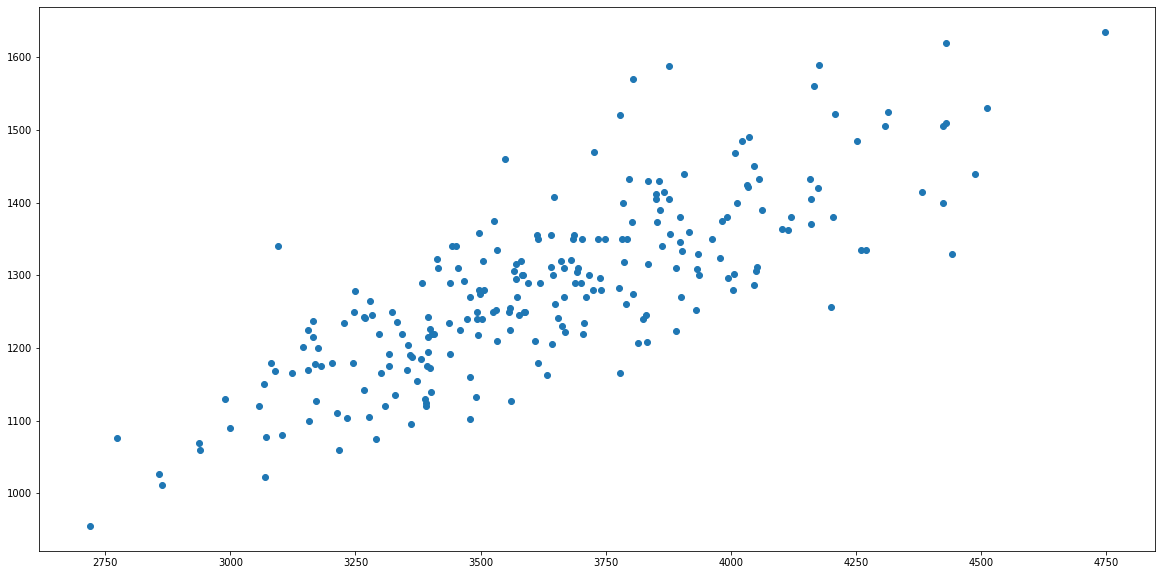

In [4]:
#Check the correlation between X and Y
plt.scatter(data['Head Size(cm^3)'],data['Brain Weight(grams)'])

In [6]:
np.corrcoef(data['Head Size(cm^3)'],data['Brain Weight(grams)'])[0,1]

0.7995697092542962

(array([ 4., 13., 31., 50., 50., 43., 23., 14.,  8.,  1.]),
 array([2720. , 2922.7, 3125.4, 3328.1, 3530.8, 3733.5, 3936.2, 4138.9,
        4341.6, 4544.3, 4747. ]),
 <a list of 10 Patch objects>)

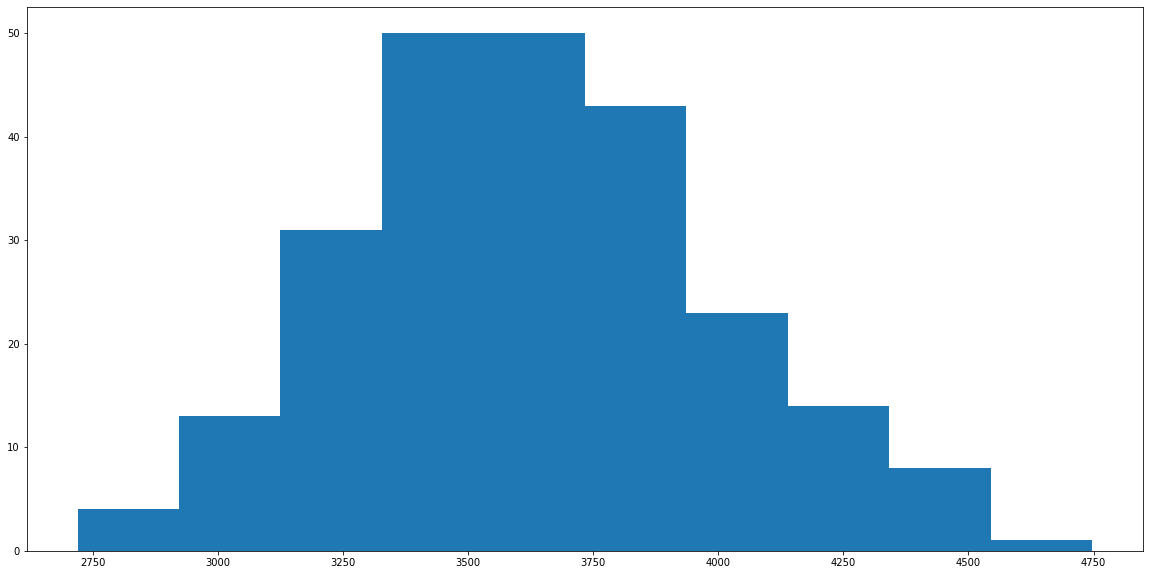

In [7]:
plt.hist(data['Head Size(cm^3)'])

In [8]:
data['Head Size(cm^3)'].describe()

count     237.000000
mean     3633.991561
std       365.261422
min      2720.000000
25%      3389.000000
50%      3614.000000
75%      3876.000000
max      4747.000000
Name: Head Size(cm^3), dtype: float64

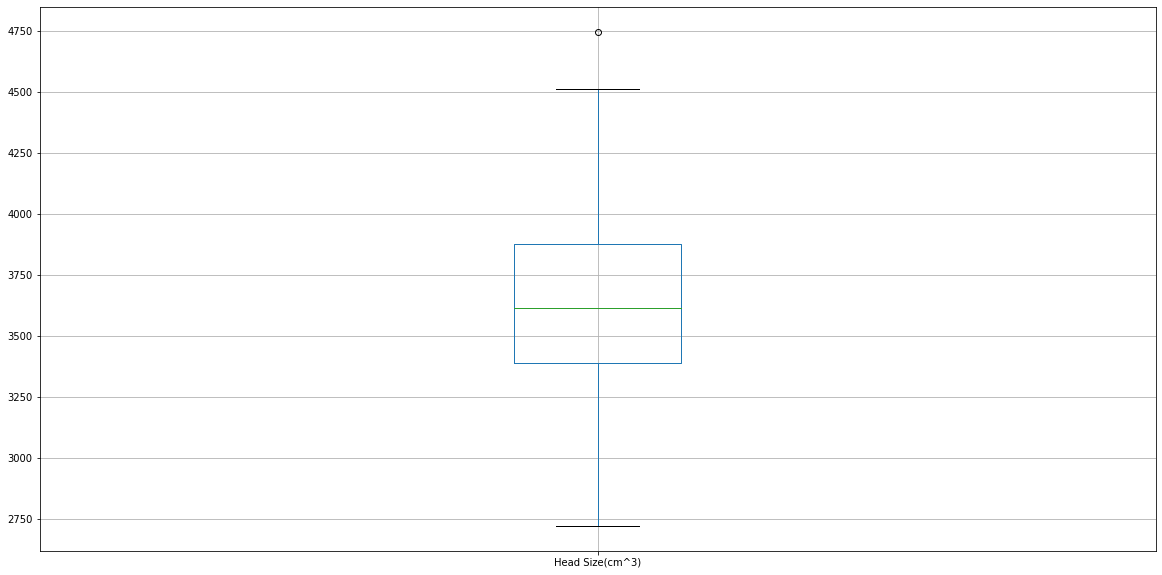

In [11]:
data.boxplot(column='Head Size(cm^3)')

In [12]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [14]:
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)

numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom

b0=mean_y-(b1*mean_x)
print(b1,b0)

0.26342933948939945 325.57342104944223


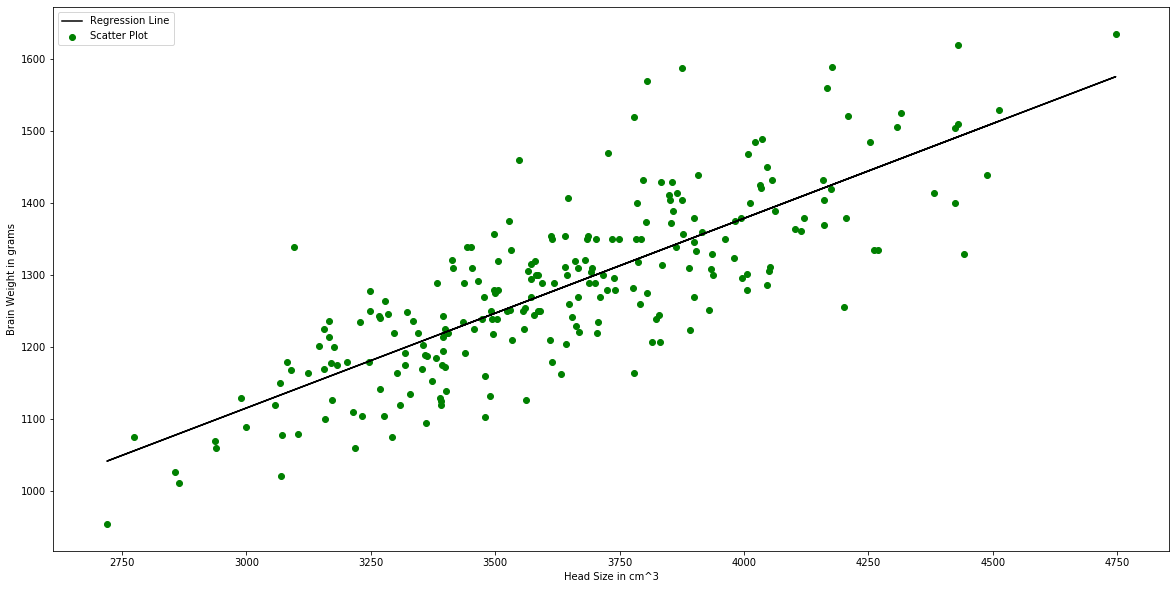

In [15]:
y_pred = b0 + b1 * X

plt.plot(X,y_pred,color='black',label='Regression Line')
plt.scatter(X,Y,c='green',label='Scatter Plot')

plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [16]:
#Calculating Root (Mean Square Error) - Cost Function
mse=0
for i in range(n):
    y_pred=b0+b1*X[i]
    mse+=(Y[i]-y_pred)**2
rmse=np.sqrt(mse/n)
print(rmse)

72.1206213783709


In [17]:
#R^2 Score - Accuracy
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
    
r2 = 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [18]:
#New Prediction - Predict Brain weight based on Head Size
new_x = 3700
y_new_pred = b0 + b1 * new_x
y_new_pred

1300.2619771602203

### Using Sci-Kit Machine Learning Package

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
X=X.reshape((n,1))

model = LinearRegression() #Creating a model object
model = model.fit(X,Y) #Training phase
y_pred = model.predict(X) #Predictions

In [21]:
model.score(X,Y) #R^2 Score

0.639311719957

In [23]:
mse = mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)
rmse

72.1206213783709

In [22]:
model.predict([[3700]])

array([1300.26197716])